<a href="https://colab.research.google.com/github/vahehambardzumyan/Function1/blob/master/traffic_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **traffic_prediction_model**

# **1. Regression of traffic flow**

Introduction
This script demonstrates a traffic flow prediction and classification system using machine learning techniques. It employs a Random Forest Regressor for regression tasks and Logistic Regression for softmax classification.

Code Workflow
1. Import Necessary Libraries

Pandas: For data manipulation and analysis.
Scikit-learn: For machine learning algorithms, preprocessing, and evaluation.
Matplotlib: For visualizing results.
Numpy: For numerical operations.
2. Load and Prepare the Dataset

The traffic flow dataset is loaded using pandas.
Dates are converted to timestamps (date_as_int) for numerical compatibility.
The dataset is previewed and summarized using .head(), .info(), and .describe().
3. Feature Selection

The target variable flow is separated into the feature set (X) and labels (y).
4. Split Data into Training and Testing Sets

The data is divided into training (80%) and testing (20%) subsets using train_test_split.
5. Normalize Features

Features are scaled to ensure all input variables contribute equally using StandardScaler.
6. Regression Model

A Random Forest Regressor is trained to predict traffic volume.
Key performance metrics:
Mean Squared Error (MSE): Measures prediction errors.
R² Score: Indicates model accuracy.
7. Visualization

A scatter plot compares true and predicted traffic volumes, highlighting model performance.
8. Classification with Softmax

Simulated data is used to classify traffic into three categories:
Red: High traffic intensity.
Yellow: Medium traffic intensity.
Green: Low traffic intensity.
A Logistic Regression model with softmax is applied.
Model accuracy is evaluated using accuracy_score and outputs predictions.
Results
Regression Metrics:
MSE: (Displays error level in predictions).
R² Score: (How well the model explains variability in traffic data).
Classification Accuracy: (Percentage of correct predictions by the softmax classifier).
Key Takeaways
The Random Forest Regressor effectively predicts traffic volume.
The Logistic Regression classifier efficiently categorizes traffic into intensity levels.
Visualization aids in interpreting model predictions and true values.
This script provides a complete pipeline for traffic flow analysis, from preprocessing to regression and classification, supported by visual and statistical insights.

Dataset Loaded Successfully!
   time  flow  id      long        lat  temp  desc  visibility  weekday  \
0     0     6   1 -4.275053  55.863144  9.88   5.0           6        1   
1     1     4   1 -4.275053  55.863144  9.88   5.0           6        1   
2     2     4   1 -4.275053  55.863144  9.88   5.0           6        1   
3     3     0   1 -4.275053  55.863144  9.88   5.0           6        1   
4     4     4   1 -4.275053  55.863144  9.88   5.0           6        1   

   date_as_int  
0   1569888000  
1   1569888000  
2   1569888000  
3   1569888000  
4   1569888000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         100000 non-null  int64  
 1   flow         100000 non-null  int64  
 2   id           100000 non-null  int64  
 3   long         100000 non-null  float64
 4   lat          100000 non-null  float64
 5   te

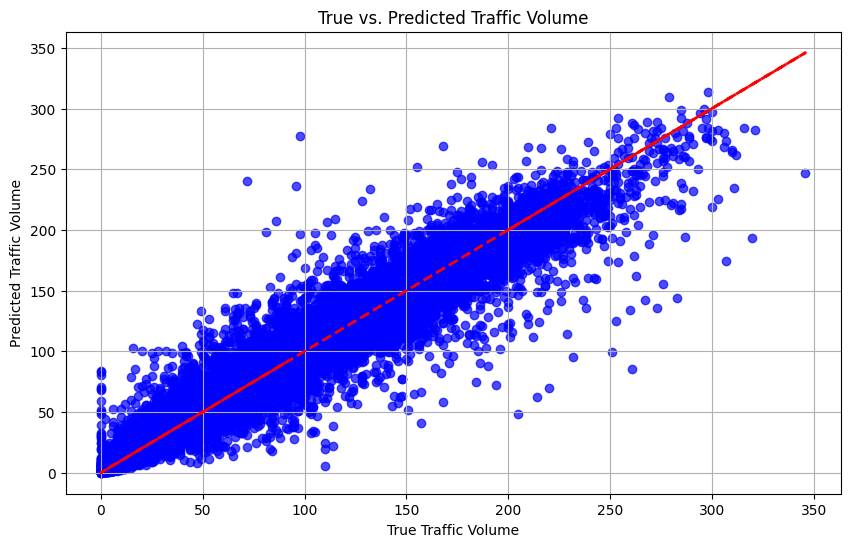

[0 0 1 1 2 2 0 2 2 1 2 1 2 0 2 0 1 2 1 1 2 1 0 2 1 2 1 0 1 1 0 2 0 0 1 0 1
 1 2 1 2 1 0 0 2 1 2 2 1 2 1 1 1 0 1 1 1 2 0 0 2 1 0 0 1 0 1 2 1 2 0 0 0 1
 1 1 1 1 2 2 0 2 1 2 2 0 1 2 0 0 0 1 2 0 1 2 2 2 1 0 0 2 0 0 1 1 2 2 0 0 0
 1 2 0 2 2 2 0 1 0]
Accuracy: 0.65


In [ ]:
##imoport all neccesary libs
##sklearn for algorithms and mathplotlib for visalization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


##Checking if all going well
df = pd.read_csv('traffic-flow-df.csv')


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date_as_int'] = df['date'].astype('int64') // 10**9
df=df.drop('date', axis=1)
df=df.head(100000)
print("Dataset Loaded Successfully!")
print(df.head())
print(df.info())
print(df.describe())

## sliceing data in to part such as our parameter and estimator values
X = df.drop('flow', axis=1)
y = df['flow']

## sliceing our project into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

#normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data normalized.")

##train ouir data with the use of RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training completed.")

##prediction
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


##visualisation part
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', marker='o')
plt.plot(y_test, y_test, 'r--', lw=2)
plt.xlabel('True Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('True vs. Predicted Traffic Volume')
plt.grid()
plt.show()



#######Softmax  classification
### we split the volumes into 3 parts , red(very intensive trafic jams, yellow( midlevel), green(low trafic inensivity))
X, y = make_classification(n_samples=600, n_features=20, n_classes=3, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a softmax classifier using Logistic Regression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)
print(predictions)
#Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")





# **2. Classification of traffic volume/High or low/**
1. Import Libraries

Pandas: For data manipulation and analysis.
Scikit-learn: For machine learning, data splitting, preprocessing, and evaluation metrics.
Seaborn & Matplotlib: For data visualization.
2. Data Loading and Preprocessing

Dataset: Traffic flow data (traffic-flow-df.csv) containing features like longitude, temperature, latitude, etc.
Preview and Analysis: Initial data checks with .head(), .info(), and .describe() for understanding the dataset structure.
Date Conversion: Dates are transformed into numerical timestamps (date_as_int) for machine learning compatibility.
Target Variable Encoding:
Traffic flow is categorized as 'High' (above 50) and 'Low' (50 or below) using a lambda function.
3. Feature Selection and Data Splitting

Features (X): Key variables such as longitude, temperature, latitude, weekday, etc.
Target (y): Traffic flow levels (High, Low).
Train-Test Split: Dataset is divided into 80% training and 20% testing subsets.
4. Data Normalization

Scaling Features: Using StandardScaler to normalize feature values for improved model performance.
5. Model Training

Logistic Regression:
Solver: lbfgs.
Maximum Iterations: 200.
Fits a linear model to predict traffic flow categories.
6. Model Evaluation

Classification Report:
Provides precision, recall, F1-score, and support for each class.
Confusion Matrix:
Summarizes correct and incorrect predictions for each class.
Visualized using a heatmap for better interpretability.
Results and Insights
Classification Metrics:
Shows how well the model distinguishes between "High" and "Low" traffic flow.
Confusion Matrix Visualization:
A heatmap illustrates prediction accuracy and areas where the model can improve.
Visualization
The confusion matrix heatmap provides a clear graphical representation of model performance, aiding in identifying misclassifications.
Key Takeaways
Logistic Regression is a simple yet effective algorithm for binary classification tasks like traffic flow prediction.
Preprocessing steps like normalization and feature encoding are critical for model performance.
Evaluation metrics and visualizations provide actionable insights for model improvement.
This workflow demonstrates an end-to-end machine learning pipeline suitable for binary classification problems, with a focus on clarity and performance evaluation.

Dataset Loaded Successfully!
         date  time  flow  id      long        lat  temp  desc  visibility  \
0  2019-10-01     0     6   1 -4.275053  55.863144  9.88   5.0           6   
1  2019-10-01     1     4   1 -4.275053  55.863144  9.88   5.0           6   
2  2019-10-01     2     4   1 -4.275053  55.863144  9.88   5.0           6   
3  2019-10-01     3     0   1 -4.275053  55.863144  9.88   5.0           6   
4  2019-10-01     4     4   1 -4.275053  55.863144  9.88   5.0           6   

   weekday  
0        1  
1        1  
2        1  
3        1  
4        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        100000 non-null  object 
 1   time        100000 non-null  int64  
 2   flow        100000 non-null  int64  
 3   id          100000 non-null  int64  
 4   long        100000 non-null  float64
 5   lat         100

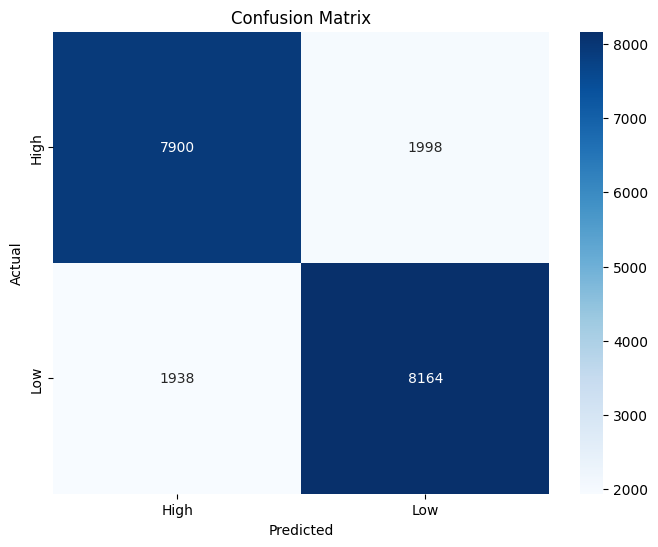

In [17]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load  dataset
data = pd.read_csv('traffic-flow-df.csv')
data=data.head(100000)
print("Dataset Loaded Successfully!")
print(data.head())
print(data.info())
print(data.describe())
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['date_as_int'] = data['date'].astype('int64') // 10**9
data=data.drop('date', axis=1)
# Display the first few rows of the dataset
print(data.head())

# Assuming your features are in columns
X = data[['long', 'temp','lat','weekday','id','time','date_as_int','visibility']]

data['flow'] = data['flow'].apply(lambda x: 'high' if x > 50 else 'low')
y = data['flow']  # This should contain 'high', 'midlevel', 'low'
print(data)
# Encode the target variable if it's categorical
y = y.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data normalized.")

# Fit Logistic Regression model
model = LogisticRegression( solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




This code demonstrates how to use a trained machine learning model to predict traffic flow (e.g., "High" or "Low") based on new input data such as location coordinates, temperature, time, and visibility. It begins by defining the input in a format compatible with the model, processes it using the model.predict() function, and outputs a clear, user-friendly prediction. This functionality is ideal for real-time applications like traffic management, route optimization, and urban planning, offering actionable insights for better decision-making.

In [14]:
# Example new input data
new_data = pd.DataFrame({
    'long': [-73.935242],
    'temp': [15],
    'lat': [40.730610],
    'weekday': [2],
    'id': [1001],
    'time': [1200],
    'date_as_int': [1680480000],
    'visibility': [10]
})

# Make a prediction for the new data
predicted_flow = model.predict(new_data)

# Display the prediction
print(f"The predicted traffic flow for the given input is: {predicted_flow[0]}")


The predicted traffic flow for the given input is: high


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# **3. Interesting conclusions**
1. Extracting Feature Importances

model.feature_importances_:
Retrieves importance scores for each feature from the trained model.
Higher values indicate greater influence on the model’s predictions.
np.argsort(importances)[::-1]:
Sorts the features by importance in descending order for clarity.
2. Visualization: Feature Importances

Bar Plot:
plt.bar: Displays a bar for each feature with height proportional to its importance score.
Helps easily compare feature relevance.
Customizations:
X.columns[indices]: Labels bars with feature names, ordered by importance.
rotation=45: Rotates x-axis labels for readability.
plt.ylabel("Importance"): Adds a label for importance values.
plt.title("Feature Importances"): Provides context for the plot.
Key Insights from the Plot
Identifies the most impactful features contributing to model predictions.
Highlights less significant features, which can be considered for removal to simplify the model.
Serves as a foundation for feature engineering or refinement.
Why This is Important
Model Interpretability: Helps stakeholders understand why the model makes specific predictions.
Feature Selection: Guides decisions about which features to retain, modify, or discard in future iterations of model development.
Improved Performance: Eliminating irrelevant features can lead to more efficient and accurate models.

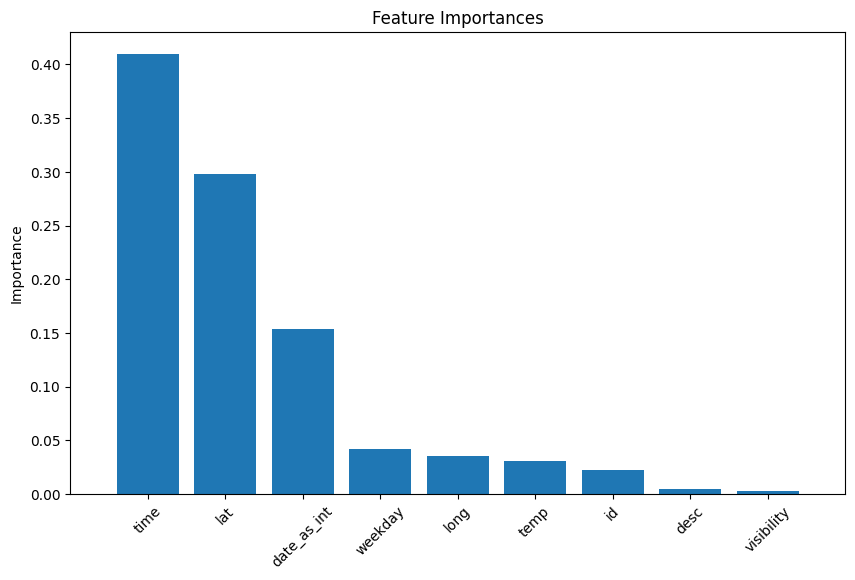

In [ ]:
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.show()

Presentation Description: Cross-Validation for Model Evaluation
Introduction
This code demonstrates how to evaluate a machine learning model's performance using cross-validation and visualize the results. Cross-validation is a robust technique to estimate a model's generalization ability by testing it across multiple subsets of the data.

Workflow Overview
1. Importing Cross-Validation Functionality

cross_val_score:
From sklearn.model_selection, performs k-fold cross-validation.
Splits the dataset into k subsets (folds), training the model on k-1 folds and testing it on the remaining fold.
Repeats the process for all folds and computes evaluation scores.
2. Performing Cross-Validation

Parameters:
model: The machine learning model to be evaluated (e.g., Random Forest, Logistic Regression).
X, y: Features and target variable.
cv=5: Specifies 5-fold cross-validation.
Output:
cv_scores: An array of scores (e.g., accuracy or R²) from each fold.
3. Visualizing Cross-Validation Scores

Line Plot:
plt.plot(cv_scores, marker='o'): Plots the scores for each fold as points connected by lines for trend visualization.
xticks: Labels the x-axis with fold indices.
ylim(0, 1): Restricts the y-axis to a range of valid scores (0 to 1) for clarity.
Gridlines: Enhances readability by making fold-specific scores easier to interpret.
Key Insights from Cross-Validation
Model Stability:
Variations in scores across folds indicate model consistency.
Generalization:
Cross-validation provides an unbiased estimate of how the model performs on unseen data.
Average Performance:
The mean of cv_scores offers a single metric to summarize model effectiveness.
Why This is Important
Avoids Overfitting: Ensures the model is not overly tailored to a single train-test split.
Reliable Evaluation: Tests the model on multiple subsets, providing a more comprehensive assessment of its robustness.
Improves Confidence: Visualizing scores helps identify patterns or irregularities in model behavior across folds.

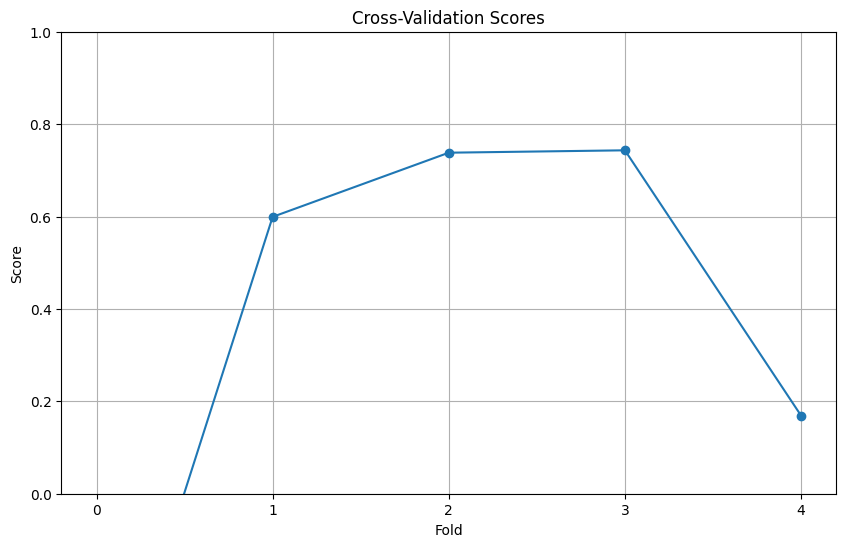

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(cv_scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(len(cv_scores)))
plt.ylim(0, 1)
plt.grid()
plt.show()